# 스플라인 회귀
회귀 문제에서 스플라인을 통해 데이터를 모형화하고자 한다. 
스플라인을 이용하면 데이터 관계 (회귀함수) 를 유연하게 탐지해낼 수 있다. 
주어진 매듭점과 차수에 대해 스플라인은 다음과 같다. 

$$
\mathsf{s}_{\beta}(x) = \sum_{j = 1}^J \beta_j B_j(x), \quad x \in \mathbb{R}
$$

스플라인은 계수에 대해 선형 함수라는 것에 주목하면, 스플라인을 이용하여 회귀 문제를 다루는 것이 다중회귀 문제를 다루는 것과 본질적으로 동일하다는 것을 알 수 있다. 
즉, 스플라인 기저 $\{B_j\}_{j=1}^J$ 를 $J$ 개의 예측변수로 간주하고 문제를 해결하면 되는 것이다. 

데이터 $\{(x_i, y_i)\}_{i=1}^n$ 이 주어졌을 때, 스플라인에 기반한 손실함수는 다음과 같다. 

$$
R(\beta) = \sum_{i=1}^n \left(y_i - \mathsf{s}_{\beta}(x_i) \right)^2 =
\sum_{i=1}^n \left(y_i - \sum_{j = 1}^J \beta_j B_j(x_i) \right)^2
$$

매듭점과 차수가 미리 정해져 있기 때문에, 스플라인 기저는 고정되어 있기 때문에, 
데이터를 잘 설명하는 스플라인 적합을 찾는 것은 스플라인 계수를 찾는 것과 동일하게 된다. 

추정 스플라인 계수를 

$$
\hat{\beta} = \text{argmin}_{\beta \in \mathbb{R}^{J}} R(\beta)
$$
로 정의하면 회귀함수에 대한 스플라인 추정량은

$$
\hat{f} = \mathsf{s}_{\hat{\beta}} = \sum_{j=1}^J \hat{\beta}_j B_j
$$

이다. 

간단한 회귀 문제를 다뤄보려고 한다. 스플라인 계수를 최소제곱법을 통해 구할 수도 있지만 좌표하강 알고리즘을 통해 계산해보려고 한다. 

### 데이터 생성
데이터 관계를 사인함수를 통해 정의하고 이를 적합해보려고 한다. 
목표는 데이터 관계를 나타내는 회귀함수 (붉은 실선) 를 데이터 (회색 점) 을 활용하여 추정하는 것이다.

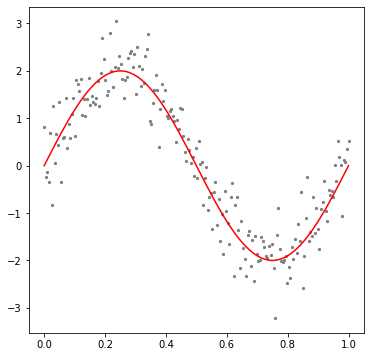

In [27]:
import numpy as np
from functions.codes import *
import matplotlib.pyplot as plt
np.random.seed(1)
n = 200
x = np.linspace(0, 1, n)
f = 2 * np.sin(2 * x * np.pi)
y = f + np.random.normal(0, 0.5, n)
plt.figure(figsize = (6, 6))
plt.scatter(x, y, s = 5, c = "gray")
plt.plot(x, f, color = 'red')
plt.show()

### 스플라인 기저 생성
매듭점의 수를 3개로 설정하였고 차수는 3을 선택하였다. 
다항식 기저 4개 (constant, linear, quadratic, cubic) 와 조각 다항식을 만들어내는 기저 3개가 될 것이다. 
다항식 기저를 제외한 나머지 3개 기저는 아래와 같다. 

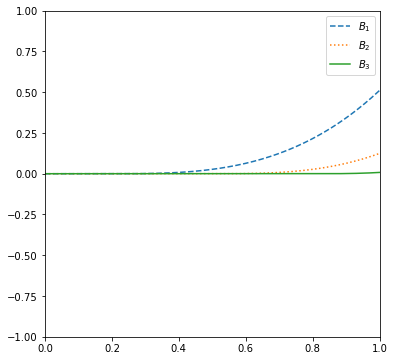

In [28]:
degree = 3
plt.figure(figsize = (6, 6))
plt.xlim([0, 1]) 
plt.ylim([-1, 1]) 
knots = np.array([0.2, 0.5, 0.8])
basis = Pspline_basis(x, knots, degree)
plt.plot(x, basis[:, 4], linestyle = '--', label = r'$B_1$')
plt.plot(x, basis[:, 5], linestyle = ':', label = r'$B_2$')
plt.plot(x, basis[:, 6], label = r'$B_3$')
plt.legend()
plt.show()

### 좌표하강 알고리즘을 통한 스플라인 적합
기저가 정해지고 다음 단계는 데이터를 잘 설명하는 계수를 찾는 것이다. 
이를 좌표하강 알고리즘을 통해 수행해보도록 하자. 
(생성한 스플라인 기저가 예측변수가 되는 것에 주목하자!)

estimated coef =  [ 2.51515974e-01  1.21498376e+01 -2.34309235e+01 -3.15711642e+00
  7.94718095e+00  1.06849849e+02 -3.92985022e+02]


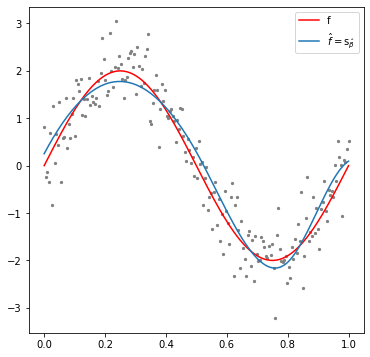

In [29]:
estimated_coef = cda(basis, y)
print("estimated coef = ", estimated_coef)
estimated_spline = np.dot(basis, estimated_coef)
plt.figure(figsize = (6, 6))
plt.scatter(x, y, s = 5, c = "gray")
plt.plot(x, f, color = 'red', label = r'f')
plt.plot(x, estimated_spline, label = r'$\hat f = \mathsf{s}_{\hat \beta}$')
plt.legend()
plt.show()

스플라인을 통해 회귀 문제를 다루어보았다. 그 장점은 복잡한 데이터의 관계를 잘 탐지할 수 있는 것으로 볼 수 있다.
다만 실제 관계는 알려지지 않았기 때문에, 적절한 매듭점의 수와 위치를 정해주는 것이 중요할 것이다. 